<a href="https://colab.research.google.com/github/rainayatullah/sceduling-and-graph-coloring/blob/main/PENJADWANAL_DALAM_REPRESENTASI_PEWARNAAN_GRAF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PENJADWANAL DALAM REPRESENTASI PEWARNAAN GRAF
(soal didapat dari situs http://rizkimuliono.blog.uma.ac.id/wp-content/uploads/sites/365/2017/10/PEWARNAAN_graph.pdf halaman 11 s.d. 13)

## Package yang digunakan

In [156]:
import pandas as pd
import networkx as nx

## Jawaban

Tabel pada soal tersebut dimasukkan ke dalam pemrograman python sebagai berikut.

In [155]:
jadwal=pd.read_csv('https://raw.githubusercontent.com/rainayatullah/sceduling-and-graph-coloring/main/coloring.csv',sep=';',index_col=0)
jadwal

,M1,M2,M3,M4,M5,M6,M7,M8
S1,0,0,0,1,0,0,1,0
S2,1,1,0,1,1,0,0,0
S3,0,0,1,0,0,1,1,1
S4,0,1,1,0,1,1,0,1
S5,1,0,0,0,0,0,0,0


Dari tabel tersebut, dibuatkan dalam representasi graf. Adapun langkah-langkah yang dilakukan adalah sebagai berikut.


1.   Buat list mahasiswa berdasarkan tabel. List mahasiswa merupakan nama kolom dari tabel yang telah dibuat.
2.   Pilih mata mata kuliah (baris yang bernilai 1 pada kolom yang bersesuaian) yang diambil oleh mahasiswa. Mata kuliah inilah yang digunakan sebagai simpul.
3.   Hubungkan simpul-simpul pada langkah 2. Inilah yang digunakan sebagai sisi.
4.   Ulangi langkah 2 sampai semua list mahasiswa pada langkah 1 terpilih semua.

Hasil graf yang dibuat adalah sebagai berikut.

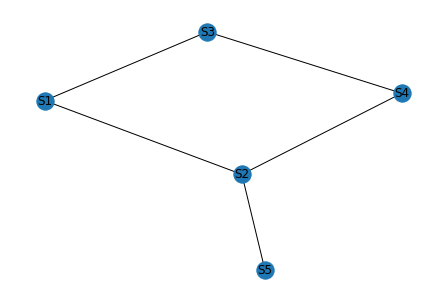

In [153]:
grap=nx.Graph()
for i in jadwal.columns:
  simpul=(jadwal[i].loc[jadwal[i]==1]).index
  sisi=[(simpul[i],simpul[i+1]) for i in range(len(simpul)-1)]
  grap.add_nodes_from(simpul)
  grap.add_edges_from(sisi)
nx.draw(grap,with_labels=True)

Untuk pewarnaan Graf, digunakan Algoritma Welch –
Powell, dengan langkah – langkah sebagai berikut :
1.   Urutkan titik – titik dari Graf dalam derajat menurun,
$ d(V_1) \geq d(V_2)\geq...\geq d(V_n)$
2.   Gunakan warna pertama (I) untuk mewarnai titik pertama (yang mempunyai derajat tertinggi $V_1$ dan titik yang tidak bertetangga dengan $V_1$.
3.   Gunakan warna ke dua (II) untuk mewarnai titik dengan derajat tertinggi berikutnya.
4.   Ulangi penambahan warna – warna sampai semua titik terwarnai.

Algoritma Welch – Powell telah dibuat dan dikembangkan dalam pemrograman python dalam modul / package networkx. berikut perintah yang digunakan beserta representasi pewarnaan graf yang dilakukan.

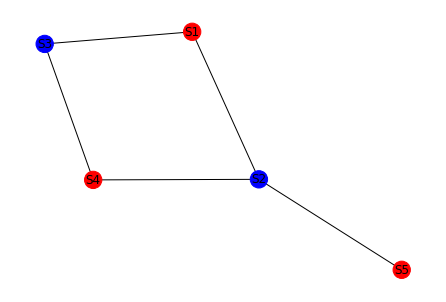

In [154]:
pewarnaan=nx.coloring.greedy_color(grap, strategy="largest_first")
warna=['red' if pewarnaan[i] == 1 else 'blue' for i in grap.nodes]
nx.draw(grap,with_labels=True,node_color=warna)